In [1]:
import pandas as pd
from exosyspop.populations import PoissonPlanetPopulation

targets = pd.read_hdf('targets.h5')
pop = PoissonPlanetPopulation(targets)

# Sanitize dtypes of targets DataFrame
for c in targets.columns:
    if targets[c].dtype == object:
        targets.loc[:,c] = targets.loc[:,c].astype(str)

import logging
rootLogger = logging.getLogger()
rootLogger.setLevel(logging.DEBUG)

/u/tdm/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
pop = PoissonPlanetPopulation(targets)

In [3]:
obs = pop.observe()
obs.columns

DEBUG:root:Accessing tra, generating orbits.
DEBUG:root:Accessing mass_B, generating binaries.
DEBUG:root:Generating planetary companions for 39626 stars...
DEBUG:root:39916 planets generated.
DEBUG:root:Generating 39916 orbits...
DEBUG:root:2 orbits assigned to ecc=rayleigh(0.03)
DEBUG:root:0 orbits assigned to ecc=0


Index([u'host', u'period', u'ecc', u'w', u'inc', u'a', u'aR', u'b_pri',
       u'b_sec', u'k', u'tra', u'occ', u'd_pri', u'd_sec', u'T14_pri',
       u'T14_sec', u'T23_pri', u'T23_sec', u'dataspan', u'dutycycle',
       u'b_target', u'flux_ratio', u'dilution', u'n_pri', u'n_sec',
       u'phase_sec'],
      dtype='object')

In [4]:
rootLogger.setLevel(logging.INFO)
pop._train_trap(N=1000)
obs = pop.observe(regr_trap=True)

Planet: Depth trained: R2=0.999381896112
Planet: Duration trained: R2=0.998002957091
Planet: Slope trained: R2=0.983618696623


In [5]:
pop.save('planets', overwrite=True)

In [6]:
pop = PoissonPlanetPopulation.load('planets')
%timeit pop.observe(new=True, regr_trap=True)

1 loops, best of 3: 192 ms per loop


In [11]:
cat = pop.get_N_observed(N=10000, new_orbits=True)

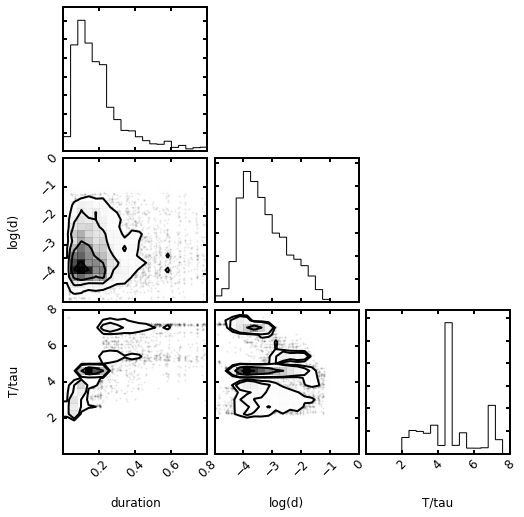

In [13]:
%matplotlib inline
cat.trap_corner(range=[(0,0.8), (-5,0), (0,8)]);